# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# === Instalasi Library Tambahan ===
# Jalankan cell ini sekali saja di Google Colab
!pip install Sastrawi nltk

# === Import Library ===

# Library umum untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Library visualisasi untuk EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Library preprocessing teks
import re
import string
import warnings
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# === Inisialisasi resource NLTK ===
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# === Konfigurasi tambahan ===
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Semua library berhasil diinstal dan diimpor!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.6 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


✅ Semua library berhasil diinstal dan diimpor!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# === MENGHUBUNGKAN GOOGLE DRIVE ===
from google.colab import drive
drive.mount('/content/drive')

# === MEMUAT DATASET ULASAN WISATA PANTAI BALI ===
path = '/content/drive/MyDrive/wisata_bali_labeled.csv'
df = pd.read_csv(path)

# Menampilkan 5 baris pertama dataset
print("===== Lima Baris Pertama Dataset =====")
display(df.head())

# Menampilkan informasi struktur data
print("\n===== Informasi Struktur Data =====")
df.info()

# Menampilkan jumlah total data dan kolom
print(f"\nJumlah total data: {len(df)} baris dan {len(df.columns)} kolom.")

# Menampilkan nama-nama kolom dataset
print("\nNama-nama kolom:")
print(df.columns.tolist())

# Menampilkan distribusi label sentimen
print("\n===== Distribusi Label Sentimen =====")
print(df['label'].value_counts())


Mounted at /content/drive
===== Lima Baris Pertama Dataset =====


,text,label
0,Terletak di tepi pantai Nusa Dua yang menawan ...,positif
1,Ini di area pantai batu bolong pantai berawa d...,positif
2,Lokasinya di area favoritku sunset road! enak ...,positif
3,Berbeda dengan Taman Safari Marine Safari Bali...,positif
4,Pantai Jimbaran terkenal dengan dua hal: sunse...,positif



===== Informasi Struktur Data =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
 1   label   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB

Jumlah total data: 1000 baris dan 2 kolom.

Nama-nama kolom:
['text', 'label']

===== Distribusi Label Sentimen =====
label
positif    816
negatif    104
netral      80
Name: count, dtype: int64


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

===== INFORMASI UMUM DATASET =====
Jumlah total data: 1000
Jumlah kolom: 2
Nama kolom: ['text', 'label']

===== CEK NILAI KOSONG =====
text     0
label    0
dtype: int64

===== CEK DATA DUPLIKAT =====
Jumlah data duplikat: 7

===== CONTOH DATA ULASAN =====


,text,label
148,@birdlovee_ aku juga setuju kalau bali memang ...,positif
640,Pengalaman Seru Berpetualang Menyusuri Jeram S...,positif
614,@JadineGood Waktu itu ada salah satu artis yg ...,negatif
581,Para peserta menikmati pengalaman kemah bareng...,positif
199,@birdlovee_ menurutku Pengalaman Wisata Terbai...,positif


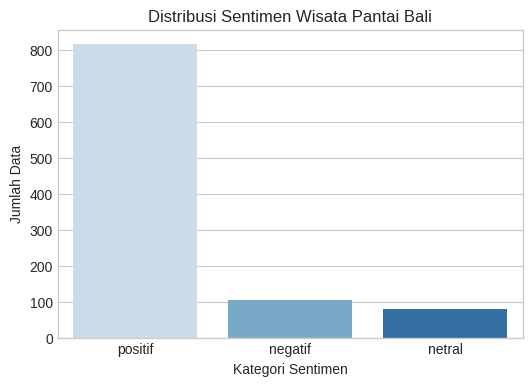


===== JUMLAH DATA PER LABEL =====
label
positif    816
negatif    104
netral      80
Name: count, dtype: int64

===== STATISTIK PANJANG ULASAN =====
count    1000.000000
mean      190.042000
std        68.840957
min        23.000000
25%       132.000000
50%       183.000000
75%       256.250000
max       349.000000
Name: panjang_teks, dtype: float64


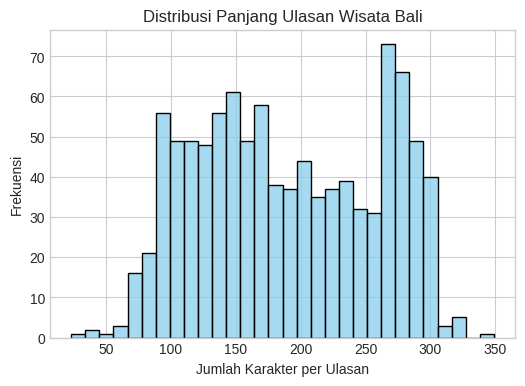

In [3]:
# === EXPLORATORY DATA ANALYSIS (EDA) ===

import matplotlib.pyplot as plt
import seaborn as sns

print("===== INFORMASI UMUM DATASET =====")
print(f"Jumlah total data: {len(df)}")
print(f"Jumlah kolom: {len(df.columns)}")
print(f"Nama kolom: {df.columns.tolist()}")

# Mengecek data kosong
print("\n===== CEK NILAI KOSONG =====")
print(df.isnull().sum())

# Mengecek data duplikat
print("\n===== CEK DATA DUPLIKAT =====")
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

# Melihat contoh data acak
print("\n===== CONTOH DATA ULASAN =====")
display(df.sample(5))

# Distribusi label sentimen
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Blues')
plt.title("Distribusi Sentimen Wisata Pantai Bali")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Data")
plt.show()

print("\n===== JUMLAH DATA PER LABEL =====")
print(df['label'].value_counts())

# Panjang rata-rata teks
df['panjang_teks'] = df['text'].apply(len)
print("\n===== STATISTIK PANJANG ULASAN =====")
print(df['panjang_teks'].describe())

# Visualisasi panjang teks
plt.figure(figsize=(6,4))
sns.histplot(df['panjang_teks'], bins=30, color='skyblue')
plt.title("Distribusi Panjang Ulasan Wisata Bali")
plt.xlabel("Jumlah Karakter per Ulasan")
plt.ylabel("Frekuensi")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# === DATA PREPROCESSING - ULASAN WISATA PANTAI BALI ===

import re
import string
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# === Download resource NLTK (WAJIB DIJALANKAN SEKALI) ===
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')  # Fix error LookupError: punkt_tab not found

# === Membuat stemmer Bahasa Indonesia ===
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# === Daftar stopwords bahasa Indonesia ===
stop_words = set(stopwords.words('indonesian'))

# === Fungsi preprocessing teks ===
def clean_text(teks):
    # 1. Case folding (ubah semua huruf ke huruf kecil)
    teks = teks.lower()

    # 2. Hapus URL, angka, dan tanda baca
    teks = re.sub(r'http\S+|www\S+|https\S+', '', teks)  # hapus link
    teks = re.sub(r'\d+', '', teks)                      # hapus angka
    teks = teks.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca

    # 3. Tokenizing (ubah kalimat jadi list kata)
    tokens = word_tokenize(teks)

    # 4. Stopword removal (hapus kata umum yang tidak bermakna)
    tokens = [kata for kata in tokens if kata not in stop_words]

    # 5. Stemming (ubah kata ke bentuk dasar)
    hasil = [stemmer.stem(kata) for kata in tokens]

    # 6. Gabungkan kembali ke string
    return " ".join(hasil)

# === Terapkan fungsi ke semua teks ===
df['clean_text'] = df['text'].apply(clean_text)

# === Cek hasil pembersihan pada 5 data pertama ===
print("===== HASIL PREPROCESSING =====")
display(df[['text', 'clean_text', 'label']].head())

# === Hapus duplikasi jika ada ===
before = len(df)
df.drop_duplicates(subset='clean_text', inplace=True)
after = len(df)

print(f"\nData duplikat yang dihapus: {before - after}")
print(f"Total data akhir setelah preprocessing: {after}")

# === Simpan hasil preprocessing ke file baru di Google Drive ===
df.to_csv('/content/drive/MyDrive/wisata_bali_preprocessed.csv', index=False)
print("\n✅ Data preprocessing selesai dan disimpan ke Drive sebagai 'wisata_bali_preprocessed.csv'")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


===== HASIL PREPROCESSING =====


,text,clean_text,label
0,Terletak di tepi pantai Nusa Dua yang menawan ...,letak tepi pantai nusa tawan kayuputi restaura...,positif
1,Ini di area pantai batu bolong pantai berawa d...,area pantai batu bolong pantai awa pantai pere...,positif
2,Lokasinya di area favoritku sunset road! enak ...,lokasi area favorit sunset road enak luncur ke...,positif
3,Berbeda dengan Taman Safari Marine Safari Bali...,beda taman safari marine safari bal tawar alam...,positif
4,Pantai Jimbaran terkenal dengan dua hal: sunse...,pantai jimbaran kenal sunset indah seafood seg...,positif



Data duplikat yang dihapus: 24
Total data akhir setelah preprocessing: 976

✅ Data preprocessing selesai dan disimpan ke Drive sebagai 'wisata_bali_preprocessed.csv'
